# 泰坦尼克号数据预处理处理实践

In [1]:
import pandas as pd#ipython notebook
titanic = pd.read_csv("titanic_train.csv")
# 改列名为中文名
titanic.columns=['id','生还情况','船舱等级','姓名','性别','年龄','兄弟数','姐妹数','票号','船票价格','仓位','上船港口']
titanic.head(5)

,id,生还情况,船舱等级,姓名,性别,年龄,兄弟数,姐妹数,票号,船票价格,仓位,上船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据情况预览
# -------------------------------------------------------
### 船舱等级,性别,年龄,兄弟数,姐妹数,船票价格  5个特征为数值型特征
# -------------------------------------------------------
### 仓位,上船港口  2个特征是信息型特征

In [2]:
"""年龄特征的处理:填充缺失值"""


titanic["年龄"] = titanic["年龄"].fillna(titanic["年龄"].median())
titanic.describe()

,id,生还情况,船舱等级,年龄,兄弟数,姐妹数,船票价格
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
"""性别特征的处理:数值化"""


print(titanic["性别"].unique())
# Replace all the occurences of male with the number 0.
titanic.loc[titanic["性别"] == "male", "性别"] = 0
titanic.loc[titanic["性别"] == "female", "性别"] = 1


['male' 'female']


In [4]:
"""上船港口onehot编码数值化"""

print(titanic["上船港口"].unique())
titanic["上船港口"] = titanic["上船港口"].fillna('S')
print(titanic["上船港口"].unique())

df_gangkou = pd.get_dummies(titanic["上船港口"])
df_gangkou.columns=["港口C","港口Q","港口S",]
# df_gangkou

['S' 'C' 'Q' nan]
['S' 'C' 'Q']


In [5]:
"""这里发现票号实在是太乱了,要继续分类可能要用到nlp文本分析,能力受限,只能舍弃这个特征,姓名和id同理"""
# print(titanic['票号'].unique())

'这里发现票号实在是太乱了,要继续分类可能要用到nlp文本分析,能力受限,只能舍弃这个特征,姓名和id同理'

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置plt的字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 转化特征列为onehotvector
df1 = titanic.loc[:,['船舱等级','性别','年龄','兄弟数','姐妹数','船票价格']]
df2 = pd.concat([df1,df_gangkou,titanic['生还情况']],axis=1)
df2.head(10)

,船舱等级,性别,年龄,兄弟数,姐妹数,船票价格,港口C,港口Q,港口S,生还情况
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0
5,3,0,28.0,0,0,8.4583,0,1,0,0
6,1,0,54.0,0,0,51.8625,0,0,1,0
7,3,0,2.0,3,1,21.0750,0,0,1,0
8,3,1,27.0,0,2,11.1333,0,0,1,1
9,2,1,14.0,1,0,30.0708,1,0,0,1


,船舱等级,性别,年龄,兄弟数,姐妹数,船票价格,港口C,港口Q,港口S,生还情况
船舱等级,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.338481
性别,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,0.543351
年龄,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.064910
兄弟数,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,-0.035322
姐妹数,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.081629
船票价格,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.257307
港口C,-0.243292,0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.168240
港口Q,0.221009,0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.003650
港口S,0.074053,-0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.149683
生还情况,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,1.000000


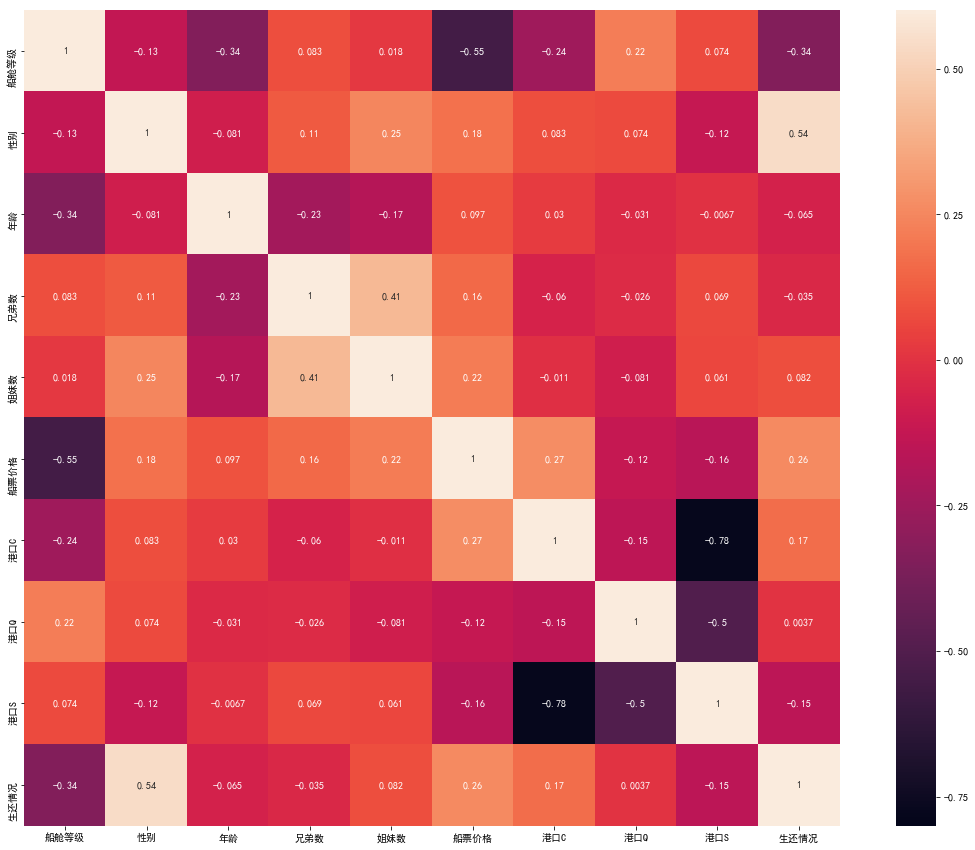

In [32]:
"""画出热力图"""

a = plt.subplots(figsize=(20,15))
a = sns.heatmap(df2.corr(), vmin=-0.8, vmax=0.6 , annot=True , square=True)
# df2.corr()

## 建模部分:
### 单树,  随机森林,  Xgboost

In [89]:
"""数据划分训练集和测试集"""

from sklearn.model_selection import train_test_split

"""训练"""
X_train,X_test,y_train,y_test = \
    train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1:], test_size=0.4, random_state=23)



In [181]:
"""单树模型（分类）"""
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
# 实例化一个新的树模型来记录决策树（单树）的训练分数,这里保持随机数种子是23不变
dtc= tree.DecisionTreeClassifier(max_features=4,max_depth=5,min_samples_leaf=1,\
                                      min_samples_split=20,
                                      random_state=23)
# 把训练数据喂给随机森林模型
dtc.fit(X_train,y_train)
# 预先测试
pre_test=dtc.predict(X_test)
# 用测试集计算准确率
dtc_score = dtc.score(X_test,y_test) 
print('单树模型正确率:',dtc_score)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(dtc.feature_importances_)  # 打印各个特征的比重
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(confusion_matrix(y_test,pre_test))  #输出预测结果的混淆矩阵
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(classification_report(y_test,pre_test))  #  打印分类报告

单树模型正确率: 0.8207282913165266
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[0.18472654 0.56204143 0.14601693 0.01008974 0.         0.09712536
 0.         0.         0.        ]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[202  23]
 [ 41  91]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       225
           1       0.80      0.69      0.74       132

   micro avg       0.82      0.82      0.82       357
   macro avg       0.81      0.79      0.80       357
weighted avg       0.82      0.82      0.82       357



In [187]:
"""随机森林模型"""
from sklearn.ensemble import RandomForestClassifier

# 实例化模型并命名（保持随机数种子random_state不变,树数量n_estimators默认为10棵）
rfc = RandomForestClassifier(max_features=6,n_estimators=80,min_samples_leaf=1,\
                                      min_samples_split=30,max_depth=6,
                                      random_state=23)
# 把训练数据喂给随机森林模型
rfc.fit(X_train,y_train)

# 预先测试
pre_test_rfc=dtc.predict(X_test)

# 用测试集计算准确率
rfc_score = rfc.score(X_test,y_test) 

print('随机森林模型正确率:',rfc_score)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print(rfc.feature_importances_)  # 打印各个特征的比重
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print(confusion_matrix(y_test,pre_test_rfc))  #输出预测结果的混淆矩阵
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

print(classification_report(y_test,pre_test_rfc))  #  打印分类报告

随机森林模型正确率: 0.8235294117647058
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[0.16721624 0.5155175  0.12081417 0.02116579 0.01753584 0.11621218
 0.01411583 0.0112658  0.01615665]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[202  23]
 [ 41  91]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       225
           1       0.80      0.69      0.74       132

   micro avg       0.82      0.82      0.82       357
   macro avg       0.81      0.79      0.80       357
weighted avg       0.82      0.82      0.82       357



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [183]:
"""随机森林优化参数"""
"""
优化参数的随机森林（树的数量，节点分裂最小样本数）

GridSearchCV是一个通过内置for循环来帮助选择模型参数的工具

"""
from sklearn.model_selection import GridSearchCV
# 把参数及其候选值通过dict的格式传递给一个变量tree_parm_grid
tree_parm_grid = {'max_depth':[2,4,6],
                  'max_features':[2,4,6],
                  'min_samples_split':[10,20,30], 
                  'n_estimators':[30,50,80]}
# 实例化并命名grid模型
grid = GridSearchCV(RandomForestClassifier(random_state=23),param_grid = tree_parm_grid,cv=5,return_train_score=False)
# 把训练集喂给grid模型
grid.fit(X_train,y_train,)
# 打印分数列表、最优参数及其分数
grid.cv_results_, grid.best_params_, grid.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'mean_fit_time': array([0.06007233, 0.04643011, 0.07144728, 0.03002005, 0.05323572,
         0.08025308, 0.03102102, 0.05223389, 0.07885246, 0.03002062,
         0.05163503, 0.07805223, 0.03182178, 0.04934211, 0.07825141,
         0.03222175, 0.04897366, 0.07645073, 0.03042002, 0.04823184,
         0.07515659, 0.03522339, 0.0515749 , 0.07924104, 0.03222089,
         0.05103331, 0.07251301, 0.03081932, 0.04885263, 0.07785244,
         0.03102069, 0.05303464, 0.07965217, 0.02941456, 0.04983277,
         0.07905293, 0.03482294, 0.0575994 , 0.08605719, 0.03254614,
         0.05056787, 0.08165359, 0.0322681 , 0.05141129, 0.08249826,
         0.03308158, 0.05441575, 0.08765817, 0.0334219 , 0.05603709,
         0.09125981, 0.03522329, 0.05469398, 0.08465595, 0.03167653,
         0.05543647, 0.08485551, 0.03234382, 0.04963288, 0.07993069,
         0.03062029, 0.05223455, 0.0790535 , 0.03642416, 0.05723848,
         0.08265433, 0.03342485, 0.05623775, 0.08385572, 0.03371611,
         0.052685